![image](resources/qgss-header.png)

## Lab 8: Quantum Chemistry

<img src="resources/quantum-chemistry.png">

In this lab, you will run through an example of a quantum chemistry problem. You will be exploring the simulation of the molecule LiH in Qiskit. You will need to follow the video associated with this lab.

In [2]:
from qiskit.chemistry.drivers import PySCFDriver, UnitsType

molecular_coordinates = 'Li 0 0 0; H 1.6 0 0'

distance_unit = UnitsType.ANGSTROM

basis = 'sto3g'

driver = PySCFDriver(molecular_coordinates, unit=distance_unit)

molecule = driver.run()

h1 = molecule.one_body_integrals

print(h1)

[[-4.72739313  0.10549968  0.16696141  0.          0.         -0.0346772
   0.          0.          0.          0.          0.          0.        ]
 [ 0.10549968 -1.49264622  0.03289282  0.          0.         -0.05270788
   0.          0.          0.          0.          0.          0.        ]
 [ 0.16696141  0.03289282 -1.12554474  0.          0.          0.03044557
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -1.13579985  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.13579985  0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.0346772  -0.05270788  0.03044557  0.          0.         -0.95096659
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -4.72739313  0.10549968  0.16696141  0.          0.    

In [3]:
h2 = molecule.two_body_integrals
print(h2)

[[[[-8.29283343e-01  5.58549882e-02  6.92873148e-02 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 5.58549882e-02 -6.66878909e-03 -5.60788725e-03 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 6.92873148e-02 -5.60788725e-03 -1.08311226e-02 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   ...
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 5.58549882e-02 -6.66878909e-03 -5.60788725e-03 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [-1.83350520e-01 -3.10515039e-03  7.93404250e-03 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   [-6.72563783e-03  1.67469536e-03 -8.81386236e-05 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]
   ...
   

In [4]:
nuclear_repulsion_energy = molecule.nuclear_repulsion_energy

print(nuclear_repulsion_energy)

0.992207270475


# 1. Creating a Fermionic Operator 

In [5]:
from qiskit.chemistry import FermionicOperator

ferOp = FermionicOperator(h1=h1, h2=h2)

num_spin_orbitals = molecule.num_orbitals * 2
num_particles = molecule.num_alpha + molecule.num_beta

freeze_list = [0,6] 

remove_list = [3,8]


In [6]:
ferOp_f, energy_shift = ferOp.fermion_mode_freezing(freeze_list)

num_spin_orbitals -= len(freeze_list)
num_particles -= len(freeze_list)

print(ferOp_f.h1)

[[-0.77258172  0.0485796   0.          0.         -0.12679498  0.
   0.          0.          0.          0.        ]
 [ 0.0485796  -0.35593954  0.          0.          0.06813315  0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -0.35297897  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.35297897  0.          0.
   0.          0.          0.          0.        ]
 [-0.12679498  0.06813315  0.          0.         -0.236054    0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.77258172
   0.0485796   0.          0.         -0.12679498]
 [ 0.          0.          0.          0.          0.          0.0485796
  -0.35593954  0.          0.          0.06813315]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.35297897  0.          0.        ]
 [ 0.          0.          0.          0.        

In [7]:
ferOp_fr = ferOp_f.fermion_mode_elimination(remove_list)

num_spin_orbitals -= len(remove_list)

print(ferOp_fr.h1)

[[-0.77258172  0.0485796   0.         -0.12679498  0.          0.
   0.          0.        ]
 [ 0.0485796  -0.35593954  0.          0.06813315  0.          0.
   0.          0.        ]
 [ 0.          0.         -0.35297897  0.          0.          0.
   0.          0.        ]
 [-0.12679498  0.06813315  0.         -0.236054    0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.         -0.77258172  0.0485796
   0.         -0.12679498]
 [ 0.          0.          0.          0.          0.0485796  -0.35593954
   0.          0.06813315]
 [ 0.          0.          0.          0.          0.          0.
  -0.35297897  0.        ]
 [ 0.          0.          0.          0.         -0.12679498  0.06813315
   0.         -0.236054  ]]


# 2. Creating a Qubit Operator 

In [8]:
map_type = 'parity'

qubitOp = ferOp_fr.mapping(map_type=map_type)

print(qubitOp)
print(qubitOp.print_details())

Representation: paulis, qubits: 8, size: 193
IIIIIIII	(0.2956785198716418+0j)
IIIIIIIZ	(-0.16924658692972677+0j)
IIIIIIZX	(0.0016203457124659344+0j)
IIIIIIIX	(-0.0016203457124659344+0j)
IIIIZXXX	(0.00996005178043422+0j)
IIIIIYXY	(0.00996005178043422+0j)
IIIIIIZZ	(-0.25982209985094223+0j)
IIIIZXXZ	(-0.01955876191930432+0j)
IIIIIYYI	(-0.01955876191930432+0j)
IIIIIZZI	(-0.2907871163406006+0j)
IIIIZZII	(-0.43459982901406535+0j)
IIIZZIII	(-0.16924658692972677+0j)
IIZXZIII	(0.001620345712465934+0j)
IIIXIIII	(-0.001620345712465934+0j)
ZXXXZIII	(0.009960051780434234+0j)
IYXYIIII	(0.009960051780434234+0j)
IIZZIIII	(-0.2598220998509423+0j)
ZXXZIIII	(-0.019558761919304325+0j)
IYYIIIII	(-0.019558761919304325+0j)
IZZIIIII	(-0.29078711634060056+0j)
ZZIIIIII	(-0.43459982901406546+0j)
IIIIIIZI	(0.052636515285500694+0j)
IIIIZXXI	(-0.004191566320147111+0j)
IIIIIYYZ	(-0.004191566320147111+0j)
IIIIIZZZ	(0.06168720475907605+0j)
IIIIZZIZ	(0.08247949378222773+0j)
IIIIZXYY	(0.005456156289315983+0j)
IIIIIYYX	(

In [9]:
from qiskit.aqua.operators import Z2Symmetries

pauli_symm = Z2Symmetries.find_Z2_symmetries(qubitOp)
print(pauli_symm)

Z2 symmetries:
Symmetries:
IIIIZIII
IZZIIZZI
ZIIIIIII
Single-Qubit Pauli X:
IIIIXIII
IIIIIIXI
XIIIIIII
Cliffords:
IIIIZIII	(0.7071067811865475+0j)
IIIIXIII	(0.7071067811865475+0j)

IZZIIZZI	(0.7071067811865475+0j)
IIIIIIXI	(0.7071067811865475+0j)

ZIIIIIII	(0.7071067811865475+0j)
XIIIIIII	(0.7071067811865475+0j)

Qubit index:
[3, 1, 7]
Tapering values:
  - Possible values: [1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1], [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1]


In [10]:
qubitOp_t = Z2Symmetries.two_qubit_reduction(qubitOp, num_particles)

print(num_particles)

print(qubitOp_t)
print(qubitOp_t.print_details())

2
Representation: paulis, qubits: 6, size: 175
IIIIII	(0.2956785198716417+0j)
IIIIIZ	(-0.16924658692972672+0j)
IIIIZX	(0.0016203457124659337+0j)
IIIIIX	(-0.0016203457124659337+0j)
IIIXXX	(-0.009960051780434217+0j)
IIIYXY	(0.009960051780434217+0j)
IIIIZZ	(-0.2598220998509421+0j)
IIIXXZ	(0.019558761919304314+0j)
IIIYYI	(-0.019558761919304314+0j)
IIIZZI	(-0.2907871163406005+0j)
IIIZII	(0.4345998290140652+0j)
IIZIII	(0.16924658692972672+0j)
IZXIII	(-0.0016203457124659335+0j)
IIXIII	(-0.0016203457124659335+0j)
XXXIII	(-0.00996005178043423+0j)
YXYIII	(0.00996005178043423+0j)
IZZIII	(-0.2598220998509423+0j)
XXZIII	(-0.019558761919304318+0j)
YYIIII	(-0.019558761919304318+0j)
ZZIIII	(-0.29078711634060045+0j)
ZIIIII	(-0.4345998290140653+0j)
IIIIZI	(-0.009465025133421005+0j)
IIIXXI	(0.00020129830786980857+0j)
IIIYYZ	(-0.00020129830786980857+0j)
IIIZZZ	(0.007940339014449668+0j)
IIIZIZ	(-0.0223008315408341+0j)
IIIXYY	(-0.004635596534254276+0j)
IIIYYX	(-0.004635596534254276+0j)
IIIZIX	(-0.0062398026

In [11]:
from qiskit.aqua.algorithms import NumPyEigensolver

ee = NumPyEigensolver(qubitOp_t)

result = ee.run()
ref = result['eigenvalues']

print(ref + nuclear_repulsion_energy + energy_shift)

[-7.88159204-3.82979521e-17j]


# Creating a Variational Ansatz 

two_qubit_reduction only works with parity qubit mapping but you have jordan_wigner. We switch two_qubit_reduction to False.


[False  True False  True]


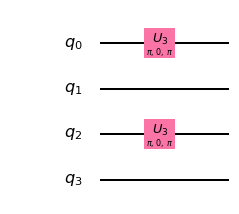

In [12]:
from qiskit.chemistry.components.initial_states import HartreeFock

init_state = HartreeFock(num_orbitals=4, num_particles=2, qubit_mapping='jordan_wigner')

print(init_state.bitstr)

HF_circuit = init_state.construct_circuit('circuit')
HF_circuit.decompose().draw(output='mpl')

In [13]:
from qiskit.chemistry.components.variational_forms import UCCSD

UCCSD_var_form = UCCSD(num_orbitals=4, num_particles=2, qubit_mapping='jordan_wigner',
                      excitation_type='s', method_singles='beta',
                      initial_state=init_state, two_qubit_reduction=False, reps=2)

print(UCCSD_var_form.single_excitations)
print(UCCSD_var_form.num_parameters)

[[2, 3]]
2


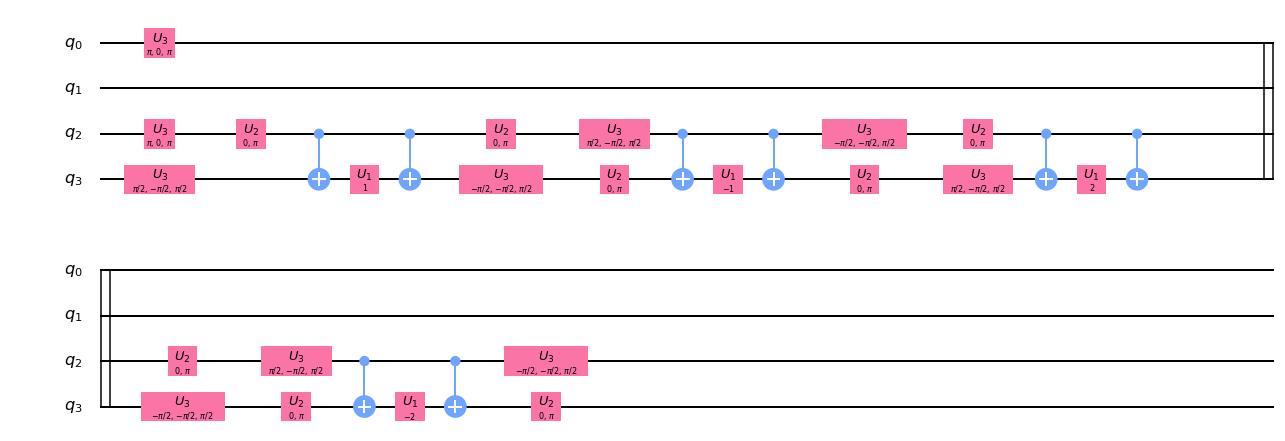

In [14]:
var_circuit = UCCSD_var_form.construct_circuit([1,2])

var_circuit.decompose().draw(output='mpl')

# Homework - The last symmetry standing 

In [15]:
from qiskit.aqua.operators import Z2Symmetries

pauli_symm = Z2Symmetries.find_Z2_symmetries(qubitOp_t)
print(pauli_symm)

Z2 symmetries:
Symmetries:
ZZIZZI
Single-Qubit Pauli X:
IIIIXI
Cliffords:
ZZIZZI	(0.7071067811865475+0j)
IIIIXI	(0.7071067811865475+0j)

Qubit index:
[1]
Tapering values:
  - Possible values: [1], [-1]


In [16]:
qubitOp_tt = pauli_symm.taper(qubitOp_t)

print(qubitOp_t)
print(qubitOp_tt[0])

print(qubitOp_tt[1])
print(qubitOp_tt[-1])

Representation: paulis, qubits: 6, size: 175
Representation: paulis, qubits: 5, size: 155
Representation: paulis, qubits: 5, size: 155
Representation: paulis, qubits: 5, size: 155


In [17]:
from qiskit.aqua.algorithms import NumPyEigensolver

ee1 = NumPyEigensolver(qubitOp_tt[1])

result1 = ee1.run()
ref1 = result1['eigenvalues']

print(ref1 + nuclear_repulsion_energy + energy_shift)

[-7.71609053+1.89760206e-17j]


In [18]:
from qiskit.aqua.algorithms import NumPyEigensolver

ee2 = NumPyEigensolver(qubitOp_tt[-1])

result2 = ee2.run()
ref2 = result2['eigenvalues']

print(ref2 + nuclear_repulsion_energy + energy_shift)

[-7.71609053-3.64348312e-18j]


In [19]:
name = <name>
email = <email>
labid = 'lab8'
exerciseid = 'ex1'

In [20]:
from IPython.display import display, Javascript;display(Javascript('IPython.notebook.save_checkpoint();'));
from grading_tools import send_code;send_code('ex1.ipynb')

<IPython.core.display.Javascript object>

Sending ex1.ipynb ...
Sent. Thanks!
